In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data
data = pd.read_csv('/Users/gonca/OneDrive/Documentos/GitHub/stock_data.csv')

In [3]:
data.head()

,Unnamed: 0,1. open,2. high,3. low,4. close,5. volume
0,2021-01-15,852.00,859.90,819.1000,826.16,38777596
1,2021-01-14,843.39,863.00,838.7500,845.00,31266327
2,2021-01-13,852.76,860.47,832.0000,854.41,33312496
3,2021-01-12,831.00,868.00,827.3400,849.44,45985569
4,2021-01-11,849.40,854.43,803.6222,811.19,59554146


In [4]:
# Like the boss says, always check the data types
data.dtypes

Unnamed: 0     object
1. open       float64
2. high       float64
3. low        float64
4. close      float64
5. volume       int64
dtype: object

In [5]:
# Let's rename the columns to make it more understandable
data.rename(columns = {'Unnamed: 0':'Date'}, inplace = True)

In [6]:
# VERY IMPORTANT!! Always have your dates as datetime format! or timestamp!
data['Date'] = pd.to_datetime(data['Date'], format = '%Y-%m-%d')

In [7]:
data.dtypes

Date         datetime64[ns]
1. open             float64
2. high             float64
3. low              float64
4. close            float64
5. volume             int64
dtype: object

In [8]:
# VERY IMPORTANT 2.0 -> Always set your date as the index!
data.set_index('Date', inplace = True)

In [9]:
data

,1. open,2. high,3. low,4. close,5. volume
Date,,,,,
2021-01-15,852.00,859.90,819.1000,826.16,38777596
2021-01-14,843.39,863.00,838.7500,845.00,31266327
2021-01-13,852.76,860.47,832.0000,854.41,33312496
2021-01-12,831.00,868.00,827.3400,849.44,45985569
2021-01-11,849.40,854.43,803.6222,811.19,59554146
...,...,...,...,...,...
2020-08-31,444.61,500.14,440.1100,498.32,115847020
2020-08-28,2295.12,2318.49,2186.5200,2213.40,20081176
2020-08-27,2180.46,2295.60,2142.5000,2238.75,23693043


# Let's do a moving average

In [10]:
# Put first the older data and then work our way to the present
data = data.iloc[::-1]

In [11]:
data

,1. open,2. high,3. low,4. close,5. volume
Date,,,,,
2020-08-25,1974.89,2027.95,1968.0000,2023.34,10658893
2020-08-26,2060.00,2166.00,2053.6291,2153.17,14239382
2020-08-27,2180.46,2295.60,2142.5000,2238.75,23693043
2020-08-28,2295.12,2318.49,2186.5200,2213.40,20081176
2020-08-31,444.61,500.14,440.1100,498.32,115847020
...,...,...,...,...,...
2021-01-11,849.40,854.43,803.6222,811.19,59554146
2021-01-12,831.00,868.00,827.3400,849.44,45985569
2021-01-13,852.76,860.47,832.0000,854.41,33312496


In [12]:
# perform moving average with rolling!
data['Moving_Average'] = data['4. close'].rolling(window = 3).mean()

C:\Users\gonca\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
# The same but not going back data points, but going days
data['Moving_Average_days'] = data['4. close'].rolling(window = '3d').mean()

C:\Users\gonca\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
data.head(10)

,1. open,2. high,3. low,4. close,5. volume,Moving_Average,Moving_Average_days
Date,,,,,,,
2020-08-25,1974.89,2027.95,1968.0000,2023.34,10658893,NaN,2023.340000
2020-08-26,2060.00,2166.00,2053.6291,2153.17,14239382,NaN,2088.255000
2020-08-27,2180.46,2295.60,2142.5000,2238.75,23693043,2138.420000,2138.420000
2020-08-28,2295.12,2318.49,2186.5200,2213.40,20081176,2201.773333,2201.773333
2020-08-31,444.61,500.14,440.1100,498.32,115847020,1650.156667,498.320000
2020-09-01,502.14,502.49,470.5100,475.05,90119419,1062.256667,486.685000
2020-09-02,478.99,479.04,405.1206,447.37,96176128,473.580000,473.580000
2020-09-03,407.23,431.80,402.0000,407.00,87596086,443.140000,443.140000
2020-09-04,402.81,428.00,372.0201,418.32,110321885,424.230000,424.230000


In [138]:
# So far we have been doing predicitons. Let's smooth it (nao esquecer .mean)
data['Moving_Average_Centered'] = data['4. close'].rolling(window = 3, center = True).mean()

C:\Users\gonca\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [139]:
data

,1. open,2. high,3. low,4. close,5. volume,Moving_Average,Moving_Average_days,Moving_Average_Centered
Date,,,,,,,,
2020-08-25,1974.89,2027.95,1968.0000,2023.34,10658893,NaN,2023.340000,NaN
2020-08-26,2060.00,2166.00,2053.6291,2153.17,14239382,NaN,2088.255000,2138.420000
2020-08-27,2180.46,2295.60,2142.5000,2238.75,23693043,2138.420000,2138.420000,2201.773333
2020-08-28,2295.12,2318.49,2186.5200,2213.40,20081176,2201.773333,2201.773333,1650.156667
2020-08-31,444.61,500.14,440.1100,498.32,115847020,1650.156667,498.320000,1062.256667
...,...,...,...,...,...,...,...,...
2021-01-11,849.40,854.43,803.6222,811.19,59554146,835.750000,811.190000,846.883333
2021-01-12,831.00,868.00,827.3400,849.44,45985569,846.883333,830.315000,838.346667
2021-01-13,852.76,860.47,832.0000,854.41,33312496,838.346667,838.346667,849.616667


In [140]:
data = data.iloc[50:]


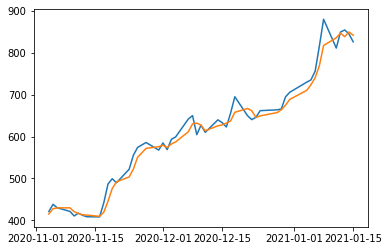

In [141]:
# Let's do some viz
plt.plot(data.index, data['4. close'])
plt.plot(data.index, data['Moving_Average'])
plt.show()

# Example with cool function

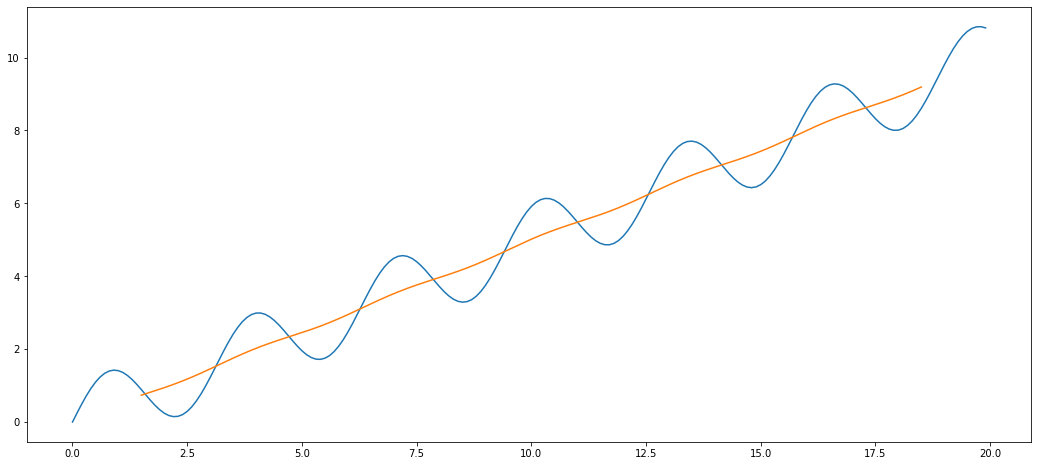

In [61]:
x = np.arange(0,20,0.1)

y = np.sin(2*x) + 0.5*x
y_smoothed = pd.DataFrame(y).rolling(window = 30, center = True).mean()

plt.plot(x,y)
plt.plot(x,y_smoothed)
plt.show()

# Advance Models

In [34]:
import statsmodels.api as sm

In [35]:
df = pd.read_excel('/Users/gonca/OneDrive/Documentos/Meu Repositório do Tableau/Fontes de dados/2019.4/pt_BR-LATAM/Sample - Superstore.xls')

In [36]:
furniture = df.loc[df['Category'] == 'Furniture']

In [37]:
furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2016-115812,2016-06-09,2016-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2016-115812,2016-06-09,2016-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032.0,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [38]:
furniture.dtypes

Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
Country/Region            object
City                      object
State                     object
Postal Code              float64
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
dtype: object

In [39]:
# Don't forget! -> Index!!

furniture.set_index('Order Date', inplace = True)

In [40]:
furniture.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2018-11-08,1,CA-2018-152156,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2018-11-08,2,CA-2018-152156,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2017-10-11,4,US-2017-108966,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
2016-06-09,6,CA-2016-115812,2016-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
2016-06-09,11,CA-2016-115812,2016-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


Order Date
2016-01-01    312.126250
2016-02-01    262.808286
2016-03-01    441.635030
2016-04-01    305.570654
2016-05-01    288.032792
2016-06-01    440.204187
2016-07-01    327.910636
2016-08-01    305.014438
2016-09-01    425.294300
2016-10-01    384.507719
2016-11-01    347.820527
2016-12-01    414.134682
2017-01-01    782.662773
2017-02-01    284.943091
2017-03-01    446.420821
2017-04-01    317.445409
2017-05-01    312.498350
2017-06-01    296.699192
2017-07-01    341.860500
2017-08-01    301.206006
2017-09-01    437.883717
2017-10-01    334.072875
2017-11-01    401.049773
2017-12-01    360.715925
2018-01-01    346.488318
2018-02-01    206.607947
2018-03-01    312.221756
2018-04-01    377.488286
2018-05-01    351.624070
2018-06-01    343.962421
2018-07-01    335.090231
2018-08-01    430.456286
2018-09-01    328.468445
2018-10-01    247.345354
2018-11-01    392.390479
2018-12-01    436.651369
2019-01-01    248.501333
2019-02-01    264.089900
2019-03-01    286.669600
2019-04-01    

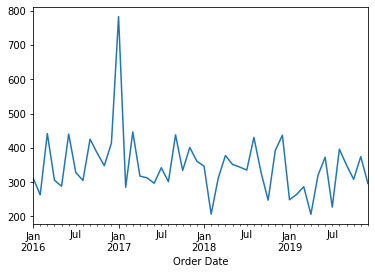

In [41]:
# let's join and resample! -> Why?
furniture['Sales'].resample('MS').mean().plot()
data = furniture['Sales'].resample('MS').mean()
data

# Cool Stuff

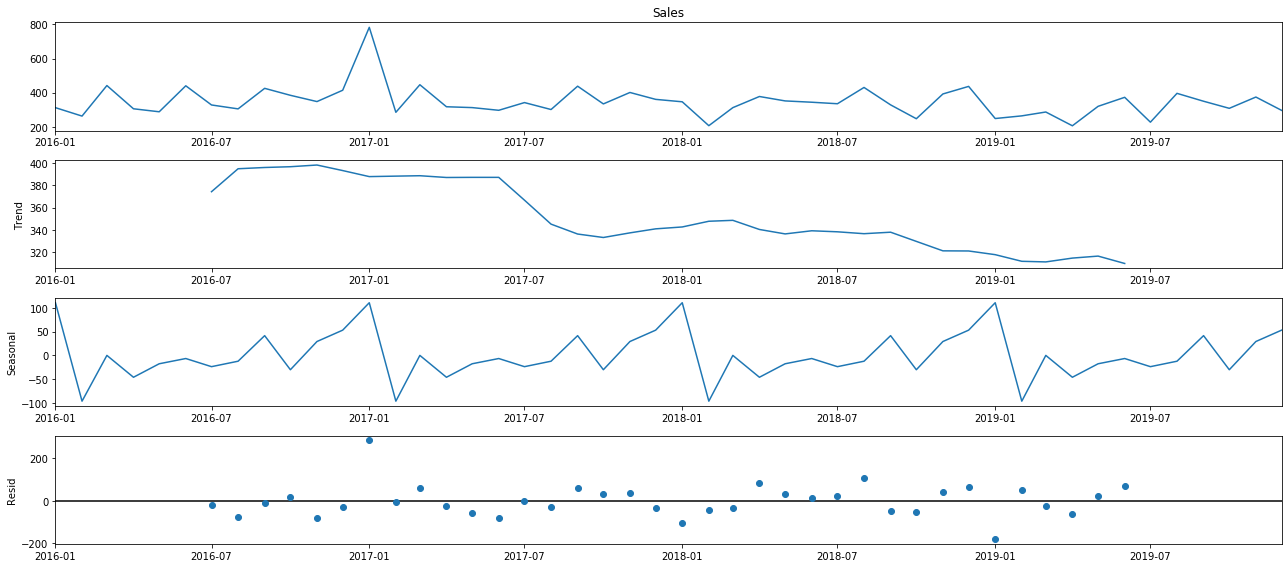

In [43]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
# The code above is just to make the image bigger

decomposition = sm.tsa.seasonal_decompose(data)
fig = decomposition.plot()
plt.show()

## ARIMA model

This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:

**AR: Autoregression.** A model that uses the dependent relationship between an observation and some number of lagged observations.

**I: Integrated.** The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.

**MA: Moving Average.** A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

A standard notation is used of ARIMA(p,d,q) where the parameters are substituted with integer values to quickly indicate the specific ARIMA model being used.

The parameters of the ARIMA model are based on:

**p (seasonality)**: The number of lag observations included in the model, also called the lag order.

**d (trend)**: The number of times that the raw observations are differenced, also called the degree of differencing.

**q (noise)**: The size of the moving average window, also called the order of moving average.

In [44]:
# It only works with the variables you want to predict
furniture = furniture['Sales']
furniture

Order Date
2018-11-08     261.9600
2018-11-08     731.9400
2017-10-11     957.5775
2016-06-09      48.8600
2016-06-09    1706.1840
                ...    
2017-03-19     383.4656
2018-12-05      13.4000
2017-09-06      85.9800
2016-01-21      25.2480
2019-02-26      91.9600
Name: Sales, Length: 2121, dtype: float64

C:\Users\gonca\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\gonca\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
C:\Users\gonca\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\gonca\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWar

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                 2120
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -16335.655
Method:                       css-mle   S.D. of innovations            537.188
Date:                Tue, 19 Jan 2021   AIC                          32685.310
Time:                        10:26:03   BIC                          32724.924
Sample:                             1   HQIC                         32699.813
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.2369      3.578     -0.066      0.947      -7.250       6.777
ar.L1.D.Sales    -0.7960      0.021    -37.054      0.000      -0.838      -0.754
ar.L2.D.Sales    -0.6206      0.027    -

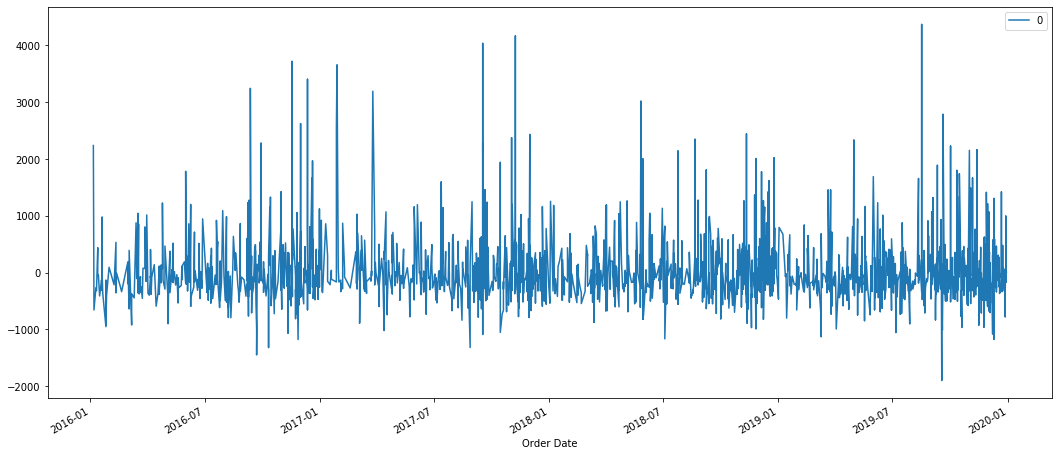

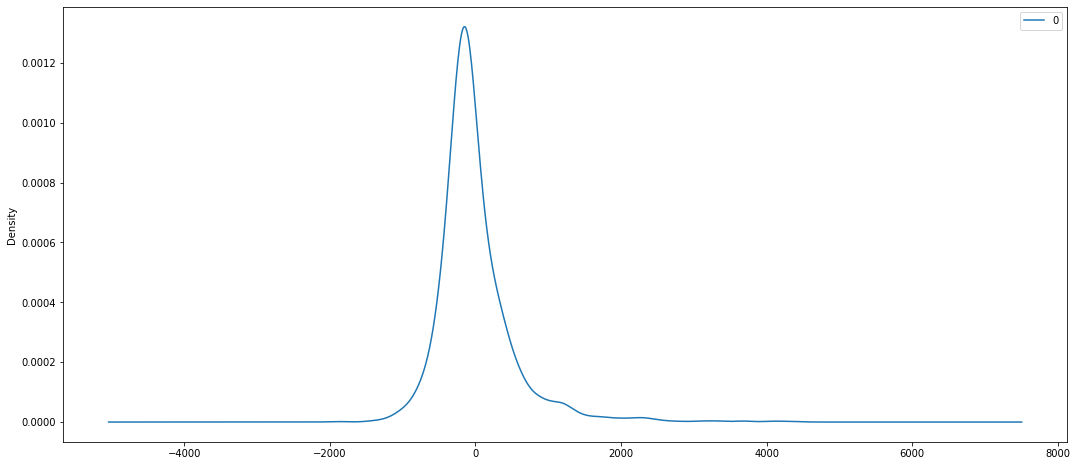

                 0
count  2120.000000
mean      0.310950
std     537.421228
min   -1901.791155
25%    -272.621433
50%    -103.233755
75%     148.221642
max    4368.908488


In [48]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(furniture, order=(5,1,0))
model_fit = model.fit()

print(model_fit.summary())

# plot residual errors: residual of an observed value is 
# the difference between the observed value and the estimated value of the quantity of interest 
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

# Forecasting

Test MSE: 394184.054


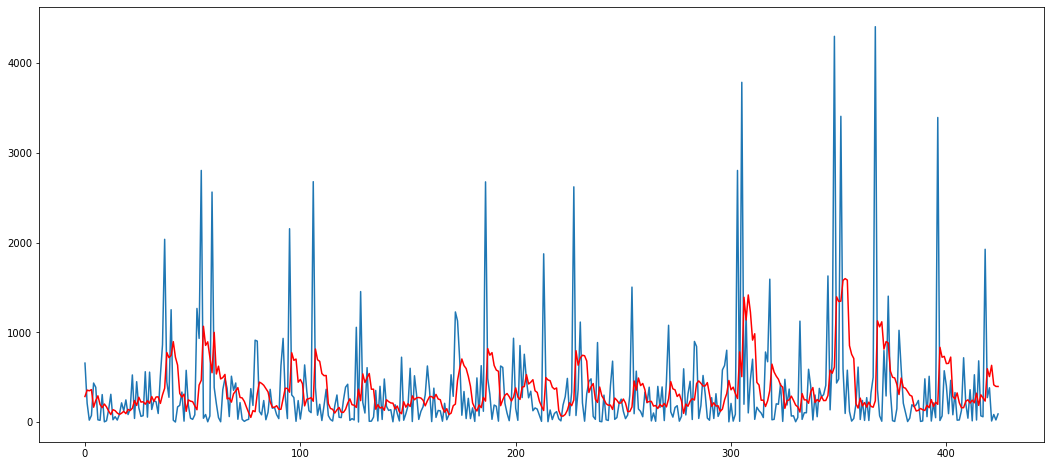

In [49]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
X = furniture.values
size = int(len(X) * 0.80)   # Split percentage

train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = []

for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0)) ## history is for having our observation for each point 
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    # print('predicted=%f, expected=%f' % (yhat, obs))
    
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()